<a href="https://colab.research.google.com/github/WajeehaAslam/Ann_lab/blob/main/effect_of_regularization_techniques_L1%2C_L2_on_mnist_dataset_SP23_BAI_054_ann_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 (S23-BAI-047)

  - To analyze how the size of the neural network (number of layers and neurons) affects the model's performance.

In [ ]:
from tensorflow import keras
from keras import datasets, regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train.shape

(60000,)

## Normalize the data

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2])).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2])).astype('float32')/255


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

## Function to build Model



In [ ]:
def build_model(input_shape, hidden_layers=1, neurons=32, regularizer=None):
  model = Sequential()
  model.add(Input(shape=input_shape))

  for _ in range(hidden_layers):
    model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizer))
    neurons//=2

  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

## Function to plot accuracy curves

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(title, train_acc, val_acc):
  plt.plot(train_acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Simple Model with only 1 hidden layer

In [ ]:
model_with_1_hidden_layer = build_model((X_train.shape[1],), hidden_layers=1, neurons=8)

In [ ]:
model_with_1_hidden_layer.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_with_1_hidden_layer = model_with_1_hidden_layer.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3979 - loss: 1.6806 - val_accuracy: 0.8568 - val_loss: 0.6209
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7025 - loss: 0.8643 - val_accuracy: 0.8845 - val_loss: 0.4763
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7345 - loss: 0.7615 - val_accuracy: 0.8951 - val_loss: 0.4138
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7455 - loss: 0.7222 - val_accuracy: 0.8978 - val_loss: 0.3975
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7579 - loss: 0.6897 - val_accuracy: 0.9007 - val_loss: 0.3732


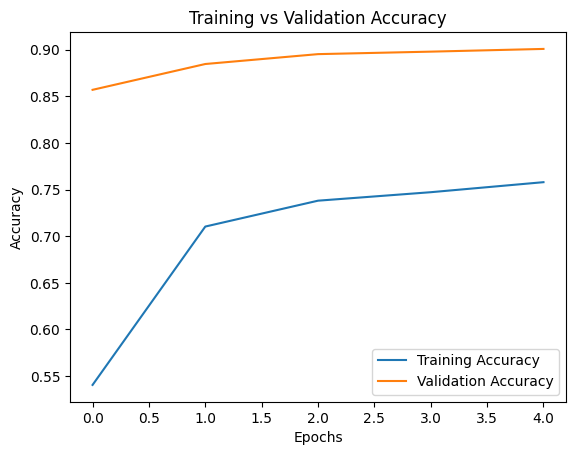

In [ ]:
plot_accuracy('Training vs Validation Accuracy', history_with_1_hidden_layer.history['accuracy'], history_with_1_hidden_layer.history['val_accuracy'])

## Complex Model with only 4 hidden layers

In [ ]:
model_without_regularizer = build_model((X_train.shape[1],), hidden_layers=4, neurons=128)

In [ ]:
model_without_regularizer.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_without_regularizer = model_without_regularizer.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9709 - val_loss: 0.1079
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9747 - val_loss: 0.1008
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9720 - val_loss: 0.1113
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9745 - val_loss: 0.1008
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9690 - val_loss: 0.1237
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9732 - val_loss: 0.1070
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9745 - val_loss: 0.1146
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.

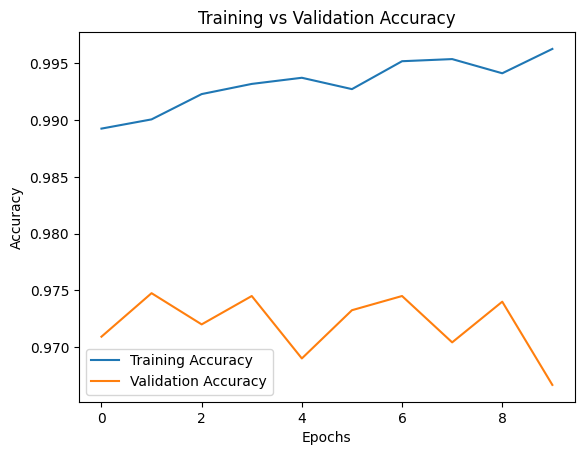

In [ ]:
plot_accuracy('Training vs Validation Accuracy', history_without_regularizer.history['accuracy'], history_without_regularizer.history['val_accuracy'])

## Model with Regularizer

In [ ]:
model_with_l2_regularizer = build_model((X_train.shape[1],), hidden_layers=2, neurons=64, regularizer=regularizers.l1(0.01))

In [ ]:
model_with_l2_regularizer.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_of_model_with_l2_regularizer = model_with_l2_regularizer.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6799 - loss: 1.8470 - val_accuracy: 0.9144 - val_loss: 0.6683
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8867 - loss: 0.7359 - val_accuracy: 0.9211 - val_loss: 0.5740
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9022 - loss: 0.6268 - val_accuracy: 0.9352 - val_loss: 0.5029
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9135 - loss: 0.5682 - val_accuracy: 0.9379 - val_loss: 0.4677
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9171 - loss: 0.5367 - val_accuracy: 0.9448 - val_loss: 0.4384
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9213 - loss: 0.5081 - val_accuracy: 0.9426 - val_loss: 0.4215
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9278 - loss: 0.4789 - val_accuracy: 0.9479 - val_loss: 0.4048
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9297 - loss: 0.4596 - val_accuracy: 0.

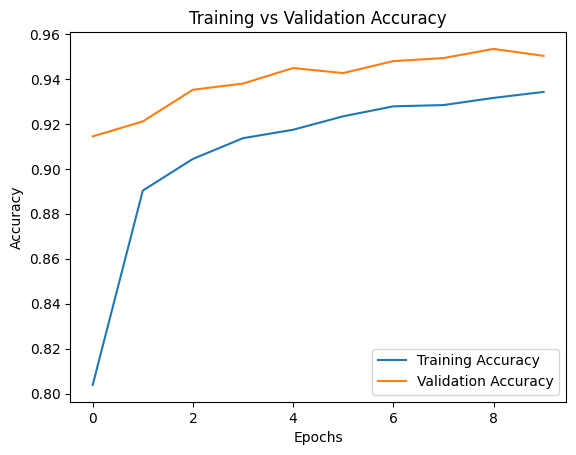

In [ ]:
plot_accuracy('Training vs Validation Accuracy', history_of_model_with_l2_regularizer.history['accuracy'], history_of_model_with_l2_regularizer.history['val_accuracy'])